# **1.Data Set Information**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In our dataset we 41k rows and 21 columns



# **1.Problem Statement**
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#**1.1Dataset Information**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric).


----##other attributes:####################

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

########social and economic context attributes#####

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

########Output variable:#####

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Setting display options
pd.options.display.max_rows = 500 
pd.options.display.max_columns = 50

In [3]:
#Reading our input files
input_file = '/home/stellapps/Downloads/Banking subscription/bank-additional-full.csv' ##Input filename
raw_data= pd.read_csv(input_file,sep=';',encoding = 'utf-8',)

In [4]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#raw_data.to_csv('Bank_Subscription_Inputfile.csv')

In [9]:
df=raw_data.copy()

In [10]:
#Size of the dataset
df.shape

(41188, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
#Checking Null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

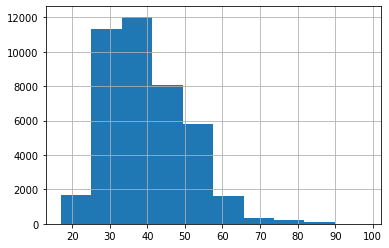

In [15]:
df['age'].hist()

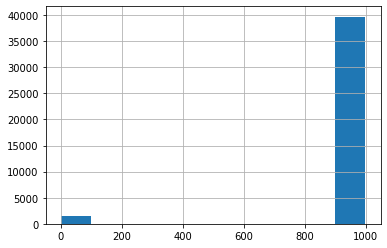

In [16]:
df['pdays'].hist()

We can see the age distribution ,we have 30 to 40yrs aged people are more 

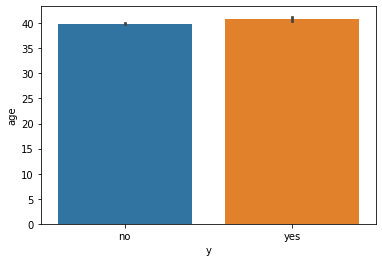

In [156]:
sns.barplot(y='age',x='y',data=df)

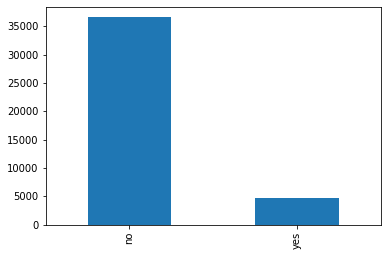

In [157]:
#Let See how our target variable is distributed
df['y'].value_counts().plot(kind='bar')

Our Target variable is imbalance data, so this i will handle in feature engineer pipline

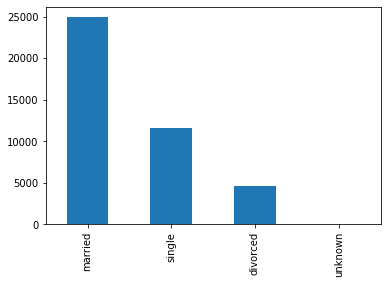

In [158]:
#Marital Status
df.marital.value_counts().plot(kind='bar')

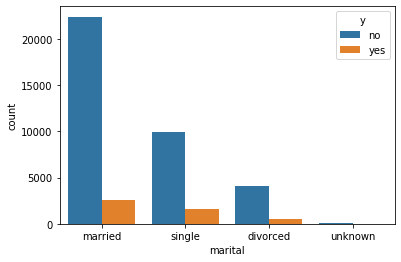

In [159]:
#Loan Vs Target Variable
sns.countplot(x="marital", hue="y", data=df)

Ooooo this is an imbalance dataset ,this we have make it balcne ,we wil perform this into in feature engneering

In [160]:
df['job'].nunique()

12

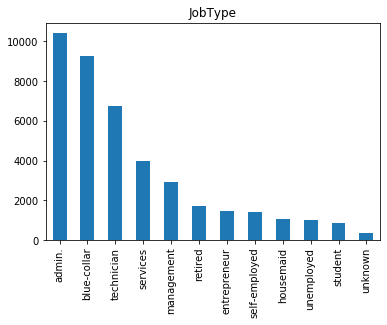

In [161]:
df['job'].value_counts().plot(kind='bar',title='JobType',figsize=(6,4))

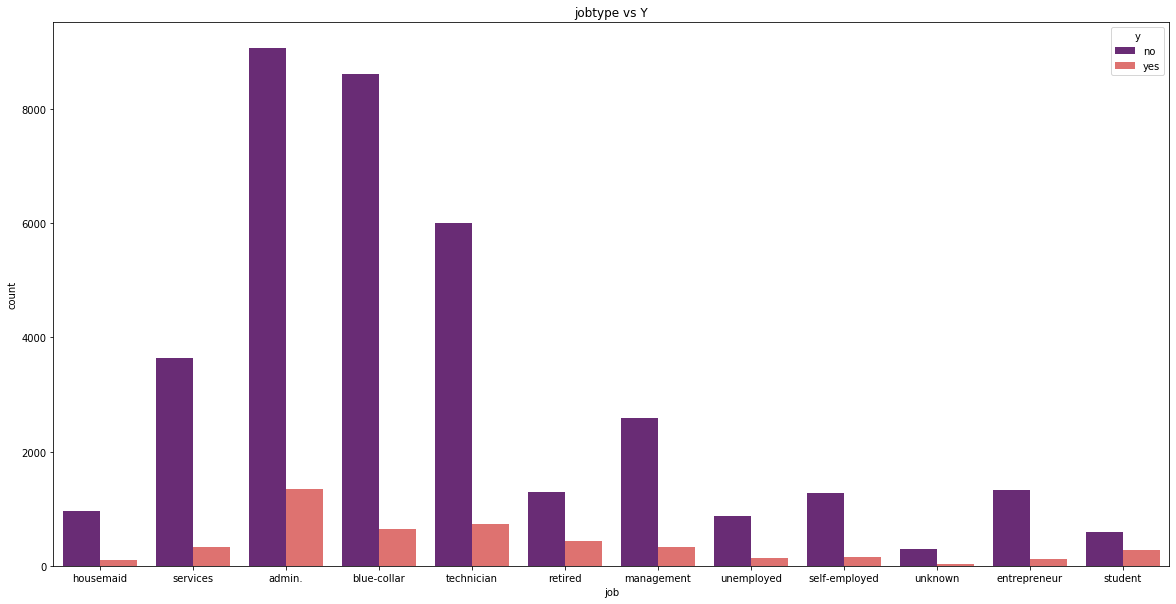

In [162]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'job', hue = 'y', data = df, palette = 'magma',)
plt.title('jobtype vs Y')
plt.show()

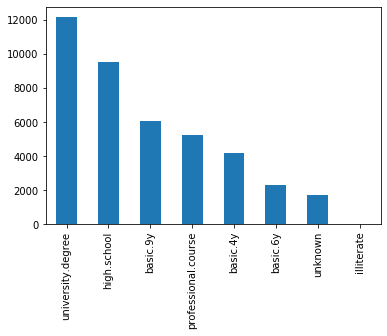

In [163]:
df['education'].value_counts().plot(kind='bar')

In [164]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

# Data Preprocessing

In [17]:
df.drop(['day_of_week'],axis=1,inplace=True) #Day of week will not effective in model building so i will drop this feature

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
print(df.job.nunique())
print(df.marital.nunique())
print(df.default.nunique())
print(df.loan.nunique())
print(df.nunique())

12
4
3
3
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [20]:
#Check any Missing values in data
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We dont have any missing values in data 

# Handling Catgorical Features

In [21]:
#One hot Encoding
cat_df = df.select_dtypes(include=['object']).copy()

# Using the dummy encoding to encode the categorical columns to numericsl ones
for col in cat_df.columns:
    
    cat_df = pd.get_dummies(cat_df, columns=[col], prefix=[col], drop_first=True)


In [22]:
cat_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y_yes
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0


In [24]:
cat_df.y_yes.value_counts()

0    36548
1     4640
Name: y_yes, dtype: int64

In [25]:
# extracting the numerical columns
num_df = df.select_dtypes(include=['int64']).copy()

In [26]:
num_df.head()

,age,duration,campaign,pdays,previous
0,56,261,1,999,0
1,57,149,1,999,0
2,37,226,1,999,0
3,40,151,1,999,0
4,56,307,1,999,0


# Scaling Numerical Feature

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_df)

In [28]:
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns)

In [29]:
scaled_num_df.head()

,age,duration,campaign,pdays,previous
0,1.533034,0.010471,-0.565922,0.195414,-0.349494
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494
4,1.533034,0.187888,-0.565922,0.195414,-0.349494


In [30]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([scaled_num_df,cat_df], axis=1)

In [31]:
final_df.head()

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0


In [32]:
 final_df.corr()  #Correlation

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y_yes
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.024191,0.031213,0.085403,0.062040,0.440772,-0.001356,-0.065731,-0.199749,-0.064383,-0.004426,0.047773,0.271266,-0.411703,0.001062,0.009897,-0.038320,-0.106550,0.017007,0.002054,-0.071138,0.069485,0.165001,0.001891,-0.001092,-0.001414,-0.001092,-0.007198,0.007021,0.065309,0.046563,-0.043563,-0.009532,0.008390,-0.067523,0.030045,0.053008,0.040889,-0.016376,0.035626,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,0.012992,0.003679,-0.004908,-0.001308,0.012421,0.004270,0.000142,0.014432,-0.013742,-0.005413,-0.006450,-0.004042,0.007808,0.009263,0.005739,0.004810,0.005500,0.001491,-0.008472,-0.012641,0.003317,-0.011588,-0.005101,-0.004897,-0.006804,-0.004897,0.000121,-0.026657,-0.041889,0.022438,0.026819,-0.023351,-0.005516,0.008054,-0.015941,0.015454,0.018011,-0.011665,0.044876,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,-0.001775,-0.002203,0.004226,-0.009135,-0.006847,0.006361,0.002383,-0.024657,0.001557,-0.000200,0.002625,0.002332,-0.007624,0.009873,-0.000991,-0.005278,0.000195,-0.002188,0.002554,-0.000950,0.002162,0.033007,-0.003803,-0.000396,-0.010800,-0.000396,0.005294,0.077368,0.015009,-0.009819,0.098385,0.070144,-0.015244,-0.032704,-0.079028,-0.049126,-0.033953,0.087645,-0.050893,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.065335,0.019246,-0.001649,0.000254,-0.072084,0.014307,0.030573,-0.096367,0.004575,-0.023085,-0.011419,0.031614,-0.042015,-0.005989,0.023238,0.036963,0.005522,-0.002086,-0.003493,-0.036958,-0.022014,0.080047,0.001668,0.002033,-0.010719,0.002033,-0.000086,0.117970,-0.003176,-0.076425,0.049695,0.015957,-0.078769,0.070690,-0.016946,-0.128677,-0.154629,0.491353,-0.950700,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.054845,-0.013239,-0.011569,0.006735,0.065113,-0.011231,-0.011885,0.104671,-0.017142,0.008426,-0.003345,-0.043420,0.048485,0.009095,-0.021493,-0.026418,0.014347,-0.002613,-0.007631,0.025419,0.022641,-0.102604,0.002766,0.003769,0.020446,0.003769,-0.002143,-0.212848,-0.048852,0.059557,-0.116785,-0.069905,0.072733,-0.012534,0.081050,0.127754,0.157651,-0.878776,0.524045,0.230181
job_blue-collar,-0.024191,0.012992,-0.001775,0.065335,-0.054845,1.000000,-0.103050,-0.087492,-0.148810,-0.112378,-0.101759,-0.175791,-0.079308,-0.238178,-0.085523,-0.048379,0.129272,-0.100192,-0.005251,0.231184,0.372303,-0.173873,0.011010,-0.126531,-0.336592,0.018869,0.176698,-0.004594,0.006673,-0.016031,0.006673,-0.006127,0.094712,-0.131318,-0.025339,0.027174,0.032989,-0.036963,0.136311,-0.062053,-0.049034,-0.054309,0.043843,-0.061403,-0.074423
job_entrepreneur,0.031213,0.003679,-0.002203,0.019246,-0.013239,-0.103050,1.000000,-0.031113,-0.052918,-0.039962,-0.036186,-0.062513,-0.028203,-0.084698,-0.030413,-0.017204,0.051050,-0.060245,0.000514,-0.005748,-0.001371,-0.031929,0.008579,-0.019858,0.051832,-0.002746,-0.000940,-0.001634,0.000861,0.004287,0.000861,-0.005449,0.018894,-0.053167,-0.010771,0.006725,0.011374,-0.019889,-0.000762,0.054461,-0.010429,-0.009172,0.007598,-0.017238,-0.016644
job_housemaid,0.085403,-0.004908,0.004226,-0.001649,-0.011569,-0.087492,-0.031113,1.000000,-0.044929,-0.033929,-0.030723,-0.053075,-0.023945,-0.071911,-0.025821,-0.014607,0.042492,-0.060971,0.003278,0.012049,-0.026678,-0.025783,0.003938,-0.034931,-0.058528,-0.001947,0.036880,-0.001387,0.00352

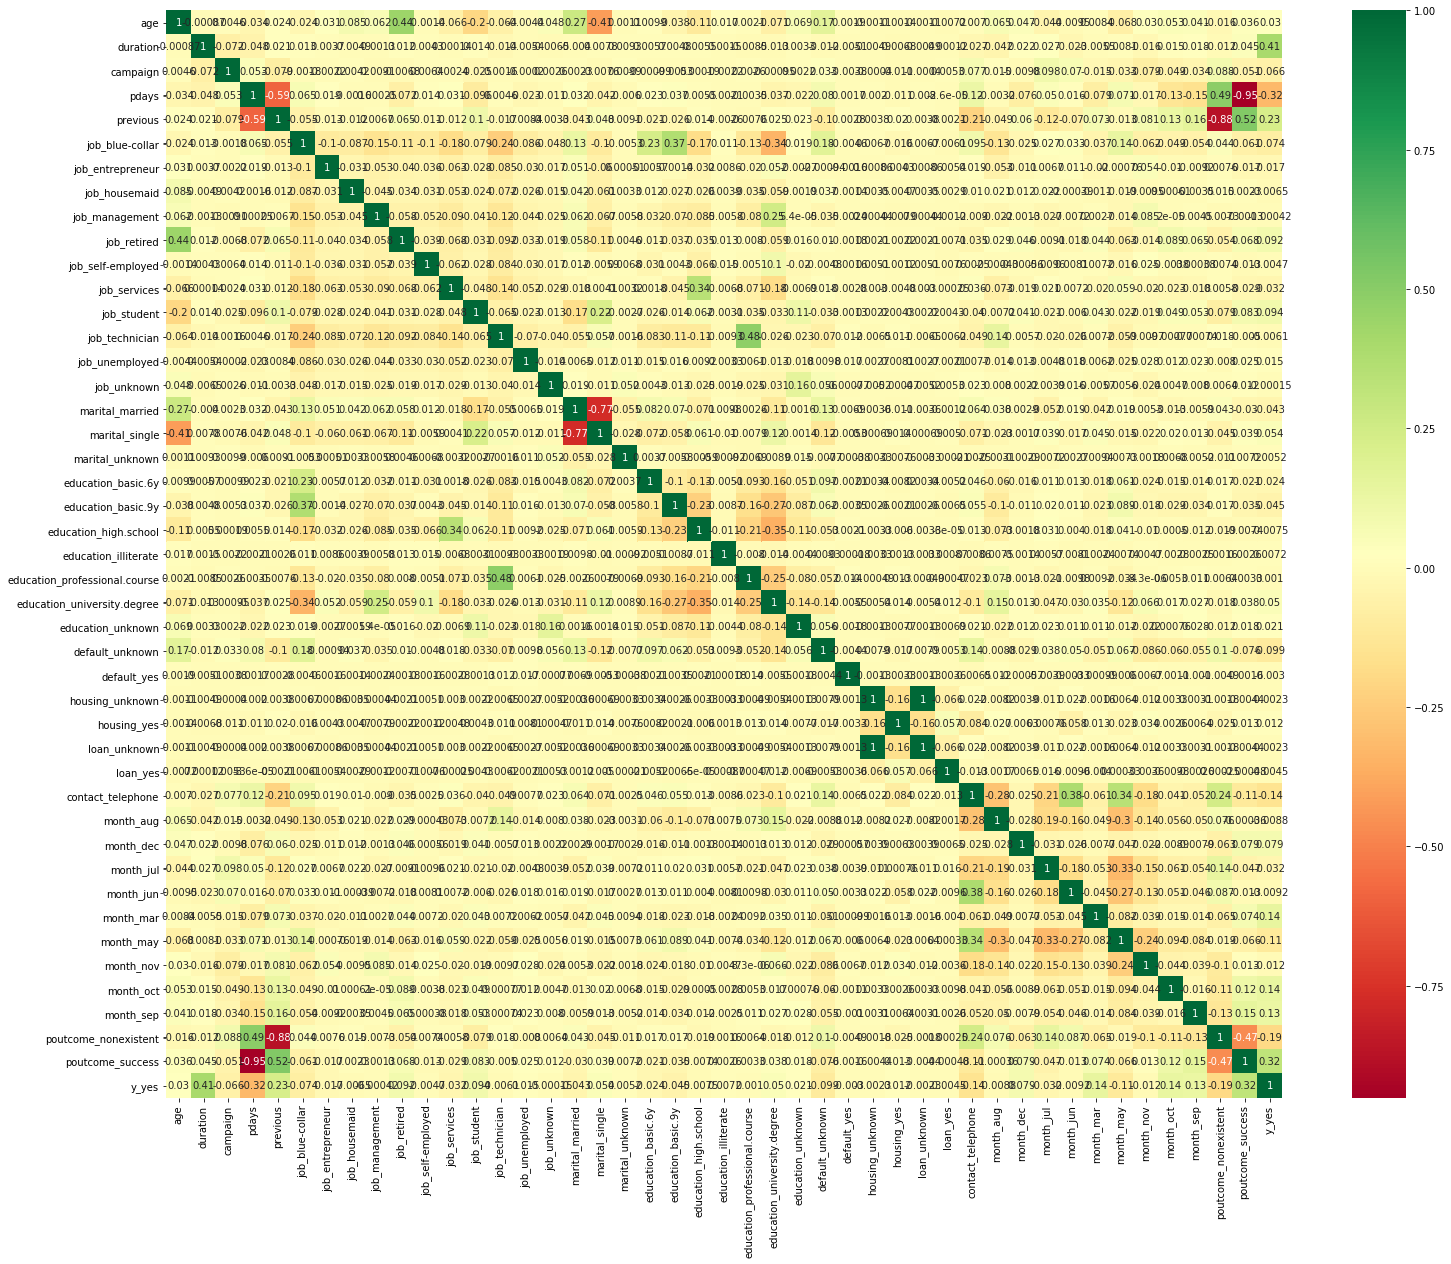

In [182]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
# separating the feature and target columns
x=final_df.drop('y_yes',axis=1)
y=final_df['y_yes']


# Handling the Imbalance dataset

Text(0, 0.5, 'Frequency')

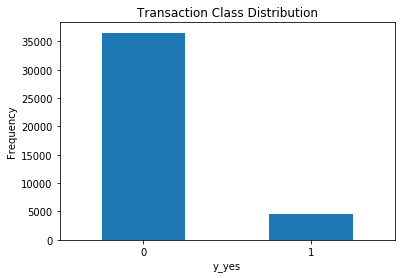

In [34]:
count_classes = pd.value_counts(final_df['y_yes'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("y_yes")

plt.ylabel("Frequency")

In [35]:
from imblearn.over_sampling import RandomOverSampler


We can clear see here this imabalce dataset,we will balance using the OverSampling Technique

In [36]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_sample(x,y)
x_sampled.shape

(73096, 44)

In [37]:
y_sampled

0        0
1        0
2        0
3        0
4        0
        ..
73091    1
73092    1
73093    1
73094    1
73095    1
Name: y_yes, Length: 73096, dtype: uint8

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 36548.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

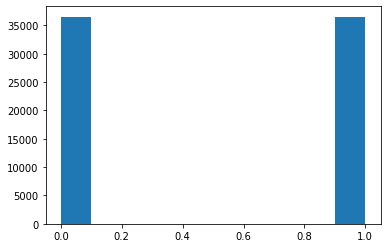

In [38]:
# again plotting the target column
plt.hist(y_sampled)

# Feature Importance

In [39]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[1.02263010e-01 2.91224184e-01 6.09287643e-02 1.09542169e-01
 1.67767607e-02 1.22525175e-02 6.89752820e-03 5.24846904e-03
 1.27114993e-02 9.09533843e-03 7.61119294e-03 1.07305466e-02
 7.74227769e-03 1.76877398e-02 6.88263638e-03 3.00606920e-03
 2.12790519e-02 1.76465308e-02 6.97971354e-04 6.82143971e-03
 1.23638753e-02 1.56683570e-02 4.55153889e-04 1.24079930e-02
 1.58549771e-02 8.00757336e-03 1.40264046e-02 1.61938679e-06
 3.14771092e-03 3.19967880e-02 3.14966344e-03 2.15567624e-02
 1.54512968e-02 1.07930936e-02 5.39181896e-03 1.05677977e-02
 1.68310356e-02 1.62527751e-02 1.17541829e-02 9.62777878e-03
 1.40434975e-02 8.43091092e-03 1.19472681e-02 3.22596894e-03]


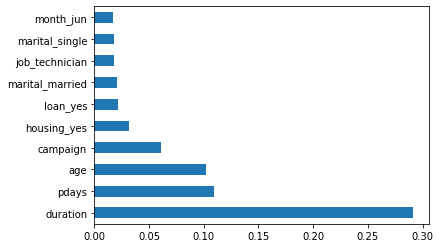

In [41]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# XGBOOST Algorithm

In [42]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_sampled,y_sampled,test_size=0.3, random_state=42)

In [43]:
#Training
import xgboost as xgb
classifier=xgb.XGBClassifier()

In [44]:
#Fitting the Model
classifier.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
#Prediction 
prediction=classifier.predict(test_x)

In [46]:
#Prediction Values into DataFrame
Prediction_DataFrame=pd.DataFrame(prediction)

In [47]:
#Model Accuracy
from sklearn.metrics import accuracy_score
Model_Accu=accuracy_score(test_y,prediction)
Model_Accu

0.9013178895526471

# Model Evaluation

In [53]:
#Importing Libraries
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score

In [54]:
#Confusion Matrics
cm=confusion_matrix(test_y,prediction)

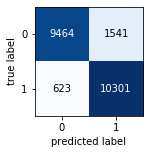

In [55]:
#isualizing Confusion Matrics
from mlxtend.plotting import plot_confusion_matrix
binary2 = np.array(cm)

fig, ax = plot_confusion_matrix(conf_mat=binary2, figsize=(2, 2))
plt.show()

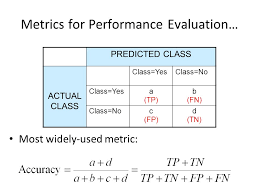

In [56]:
#Accuracy=(TP/TN)/(TP+FN+FP+TN)
Accuracy=(9533+10300)/(9533+1472+624+10300)
Accuracy

0.9044188061471111

In [57]:
f1_score(test_y,prediction)

0.9049459720636037

# Model Saving

In [76]:
#Model Saving into Pickel file
import pickle


# open a file, where you ant to store the data
file = open('XGBOOST_BANKSUBCRIPTION.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)

